In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors


plt.rcParams["figure.figsize"] = (12,8)

import csv
import requests
from datetime import datetime

plt.style.use('ggplot')

### Importing Data

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
r = requests.get(url, allow_redirects=True)
url_content = r.content
csv_file = open('owid-covid-data.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [3]:
df_raw = pd.read_csv (r'owid-covid-data.csv')
df_raw.fillna(0)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119906,ZWE,Africa,Zimbabwe,2021-09-24,129134.0,0.0,214.571,4600.0,0.0,5.429,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
119907,ZWE,Africa,Zimbabwe,2021-09-25,129505.0,371.0,252.286,4603.0,3.0,5.714,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
119908,ZWE,Africa,Zimbabwe,2021-09-26,129625.0,120.0,241.000,4604.0,1.0,5.286,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
119909,ZWE,Africa,Zimbabwe,2021-09-27,129919.0,294.0,247.571,4607.0,3.0,5.429,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0


In [4]:
#Continent is not null when location is a country and continent is null when location is a continent
df = df_raw[df_raw['continent'].notnull()]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119906,ZWE,Africa,Zimbabwe,2021-09-24,129134.0,0.0,214.571,4600.0,0.0,5.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
119907,ZWE,Africa,Zimbabwe,2021-09-25,129505.0,371.0,252.286,4603.0,3.0,5.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
119908,ZWE,Africa,Zimbabwe,2021-09-26,129625.0,120.0,241.000,4604.0,1.0,5.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
119909,ZWE,Africa,Zimbabwe,2021-09-27,129919.0,294.0,247.571,4607.0,3.0,5.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
#Missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())#False is 0, True is 1
    print('{} - {}%'.format(col, round(pct_missing*100)))

iso_code - 0%
continent - 0%
location - 0%
date - 0%
total_cases - 5%
new_cases - 5%
new_cases_smoothed - 6%
total_deaths - 14%
new_deaths - 14%
new_deaths_smoothed - 6%
total_cases_per_million - 5%
new_cases_per_million - 5%
new_cases_smoothed_per_million - 6%
total_deaths_per_million - 14%
new_deaths_per_million - 14%
new_deaths_smoothed_per_million - 6%
reproduction_rate - 16%
icu_patients - 88%
icu_patients_per_million - 88%
hosp_patients - 86%
hosp_patients_per_million - 86%
weekly_icu_admissions - 99%
weekly_icu_admissions_per_million - 99%
weekly_hosp_admissions - 98%
weekly_hosp_admissions_per_million - 98%
new_tests - 55%
total_tests - 55%
total_tests_per_thousand - 55%
new_tests_per_thousand - 55%
new_tests_smoothed - 46%
new_tests_smoothed_per_thousand - 46%
positive_rate - 49%
tests_per_case - 50%
tests_units - 45%
total_vaccinations - 78%
people_vaccinated - 79%
people_fully_vaccinated - 82%
total_boosters - 99%
new_vaccinations - 82%
new_vaccinations_smoothed - 60%
total_

### Current Total Cases per Country

In [6]:
death_rate=(df.groupby(['location'])['total_deaths'].max()/df.groupby(['location'])['total_cases'].max())*100
death_rate.sort_values(ascending=False)

location
Vanuatu                     25.000000
Yemen                       18.955191
Peru                         9.167844
Sudan                        7.588246
Mexico                       7.581086
                              ...    
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Vatican                           NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

In [7]:
#Country with highest death_rate
death_rate.loc[death_rate == death_rate.max()]

location
Vanuatu    25.0
dtype: float64

### Current Total Cases per Country

In [8]:
highest_infection_count = df.groupby(['location'])['total_cases'].max()
highest_infection_count

location
Afghanistan          155093.0
Albania              168782.0
Algeria              203045.0
Andorra               15192.0
Angola                56040.0
                       ...   
Vietnam              770640.0
Wallis and Futuna         NaN
Yemen                  9016.0
Zambia               208912.0
Zimbabwe             130272.0
Name: total_cases, Length: 224, dtype: float64

### Infection Rate Percentage  per Country

In [9]:
infection_rate=(df.groupby(['location'])['total_cases'].max()/df.groupby(['location'])['population'].max())*100
infection_rate
infection_rate.sort_values(ascending=False)

location
Seychelles                  21.609544
Montenegro                  20.778567
Andorra                     19.639579
San Marino                  15.983534
Czechia                     15.760918
                              ...    
Tonga                             NaN
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

### Highest Death Count per County

In [10]:
highest_death_count = df.groupby(['location'])['total_deaths'].max()
highest_death_count.sort_values(ascending=False)

location
United States               692969.0
Brazil                      595446.0
India                       447751.0
Mexico                      276376.0
Russia                      201854.0
                              ...   
Turkmenistan                     NaN
Turks and Caicos Islands         NaN
Tuvalu                           NaN
Vatican                          NaN
Wallis and Futuna                NaN
Name: total_deaths, Length: 224, dtype: float64

### Death Rate Percentage per Country

In [11]:
death_rate=(highest_death_count/highest_infection_count)*100
death_rate.sort_values(ascending=False)

location
Vanuatu                     25.000000
Yemen                       18.955191
Peru                         9.167844
Sudan                        7.588246
Mexico                       7.581086
                              ...    
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Vatican                           NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

### Database with continents only

In [12]:
dc = df_raw[df_raw['continent'].isnull()]
dc

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
583,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118251,OWID_WRL,NaN,World,2021-09-24,231152493.0,547765.0,499404.571,4737904.0,8828.0,8347.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
118252,OWID_WRL,NaN,World,2021-09-25,231515976.0,363483.0,475209.714,4743196.0,5292.0,8145.714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
118253,OWID_WRL,NaN,World,2021-09-26,231846936.0,330960.0,471436.429,4748335.0,5139.0,8019.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
118254,OWID_WRL,NaN,World,2021-09-27,232335077.0,488141.0,463821.286,4756130.0,7795.0,7968.000,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [13]:
#Infection rate
((dc.groupby(['location'])['total_cases'].max()/dc.groupby(['location'])['population'].max())*100).sort_values(ascending=False)

location
North America     8.714053
South America     8.684275
European Union    8.453389
Europe            7.909335
World             2.955996
Asia              1.613520
Africa            0.601159
Oceania           0.410472
International          NaN
dtype: float64

In [14]:
#total cases
dc.groupby(['location'])['total_cases'].max().sort_values(ascending=False)

location
World             232783704.0
Asia               75507272.0
Europe             59141845.0
North America      51986412.0
European Union     37802705.0
South America      37712345.0
Africa              8256838.0
Oceania              177406.0
International           721.0
Name: total_cases, dtype: float64

In [15]:
dc.groupby(['location'])['total_deaths'].max().sort_values(ascending=False).drop(labels=['World'])

location
Europe            1224061.0
South America     1153281.0
Asia              1122319.0
North America     1054069.0
European Union     769961.0
Africa             209598.0
Oceania              2155.0
International          15.0
Name: total_deaths, dtype: float64

In [16]:
#What countries are in North America?
df.loc[df['continent'] == 'North America', 'location'].value_counts()

Mexico                              637
United States                       616
Canada                              612
Guatemala                           590
Dominican Republic                  577
Costa Rica                          572
Panama                              569
Honduras                            567
Jamaica                             567
Cuba                                566
Antigua and Barbuda                 565
Saint Lucia                         564
Trinidad and Tobago                 564
Saint Vincent and the Grenadines    564
Bahamas                             562
Barbados                            561
El Salvador                         559
Nicaragua                           559
Haiti                               558
Grenada                             556
Dominica                            556
Belize                              555
Saint Kitts and Nevis               553
Cayman Islands                      276
Bermuda                             258


<AxesSubplot:ylabel='Total Deaths'>

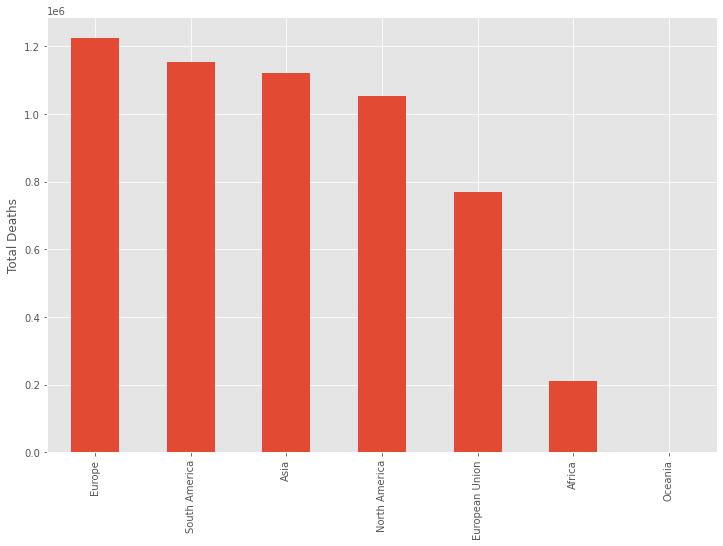

In [17]:
dc.groupby(['location'])['total_deaths'].max().sort_values(ascending=False).drop(labels=['World','International']).plot.bar(xlabel='',ylabel='Total Deaths')

### Correlation with Seaborn

In [18]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

<AxesSubplot:>

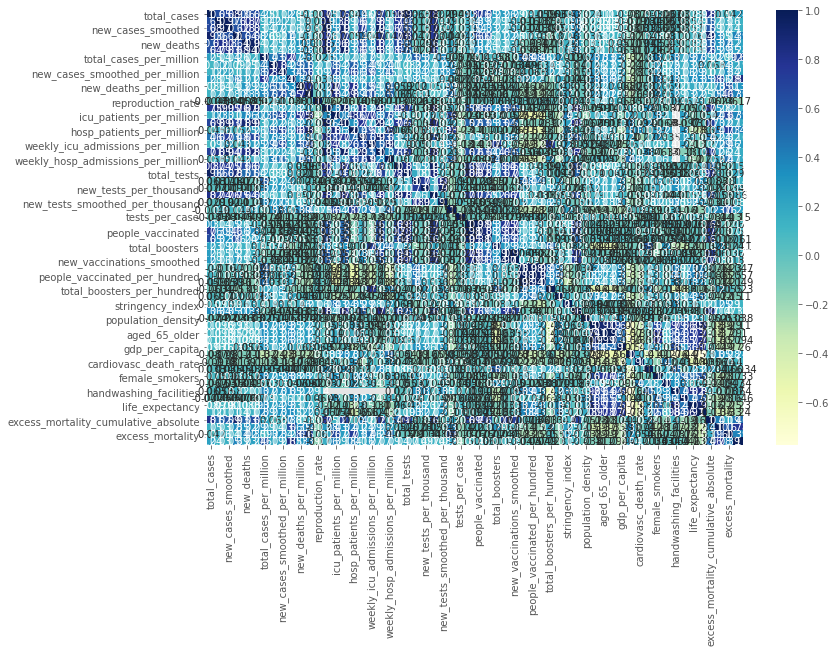

In [19]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [20]:
#Correlation values

sorted_pairs= df.corr().unstack().sort_values(ascending=False)
high_correlation= sorted_pairs[sorted_pairs > 0.9]
high_correlation

total_cases                      total_cases                        1.000000
hosp_patients_per_million        hosp_patients_per_million          1.000000
tests_per_case                   tests_per_case                     1.000000
positive_rate                    positive_rate                      1.000000
new_tests_smoothed_per_thousand  new_tests_smoothed_per_thousand    1.000000
                                                                      ...   
life_expectancy                  human_development_index            0.914379
median_age                       aged_65_older                      0.913804
aged_65_older                    median_age                         0.913804
new_cases                        icu_patients                       0.904920
icu_patients                     new_cases                          0.904920
Length: 114, dtype: float64

### Let's visualize in Tableau!

<AxesSubplot:ylabel='Total Deaths'>

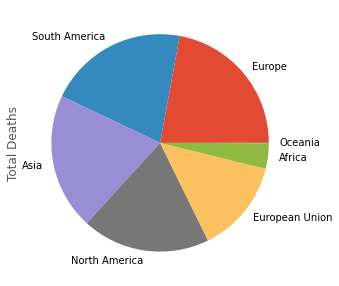

In [29]:
total_deaths = dc.groupby(['location'])['total_deaths'].max().sort_values(ascending=False).drop(labels=['World', 'International'])
total_deaths.plot.pie(figsize=(5, 5), ylabel='Total Deaths')

In [34]:
portugal= df.loc[df['location'] == 'Portugal', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']]
portugal.fillna(0).set_index('date').to_excel('portugal.xlsx', encoding='UTF8')


In [42]:
world = dc.loc[dc['location'] == 'World', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']]
world.fillna(0).set_index('date').to_excel('world.xlsx', encoding='UTF8')